# Variable transformers : YeoJohnsonTransformer

The YeoJohnsonTransformer() applies the Yeo-Johnson transformation to the
numerical variables.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.transformation import YeoJohnsonTransformer
from feature_engine.imputation import ArbitraryNumberImputer

In [2]:
#Read Data
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [4]:
# initializing transformer
yjt = YeoJohnsonTransformer(variables = ['LotArea', 'GrLivArea'])

yjt.fit(X_train)

YeoJohnsonTransformer(variables=['LotArea', 'GrLivArea'])

In [5]:
# these are the exponents for the BoxCox transformation
yjt.lambda_dict_

{'LotArea': 0.02258978732751055, 'GrLivArea': 0.06781061353154169}

<AxesSubplot:>

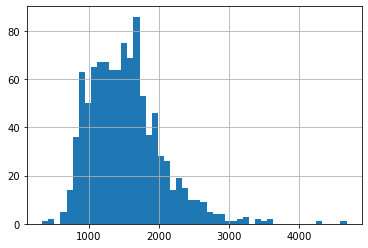

In [6]:
# before transforming 
X_train['GrLivArea'].hist(bins=50)

<AxesSubplot:>

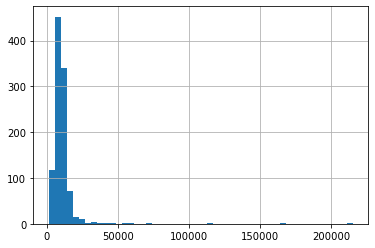

In [7]:
# before transforming 
X_train['LotArea'].hist(bins=50)

In [8]:
#transforming variables
train_t = yjt.transform(X_train)
test_t = yjt.transform(X_test)

<AxesSubplot:>

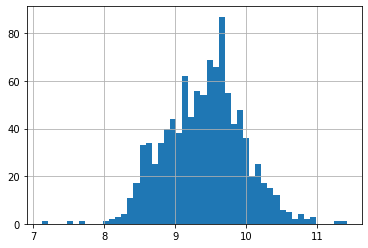

In [9]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

<AxesSubplot:>

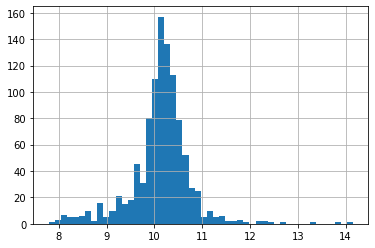

In [10]:
# transformed variable
train_t['LotArea'].hist(bins=50)

### Automatically select numerical variables

We select all numerical variables if no variables are passed. 
Before using YeoJohnsonTransformer we need to ensure numerical values dont have NA values

In [11]:
#initializing transformer for imputing missing values
arbitrary_imputer = ArbitraryNumberImputer(arbitrary_number=2)
arbitrary_imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=2,
                       variables=['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                                  'FullBath', 'HalfBath', 'BedroomAbvGr',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageYrBlt', 'GarageCars', 'GarageArea',
                                  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', ...])

In [12]:
#transforming variables
train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

In [13]:
# Keeing only numeric variables
train_t=train_t[arbitrary_imputer.variables]
test_t=test_t[arbitrary_imputer.variables]

In [14]:
#keeping only variables that have values  >=1 (we can do 1/0)
new_variables=list(train_t.ge(2).all(0)[train_t.ge(2).all(0)==True].index)
train_t=train_t[new_variables]
test_t=test_t[new_variables]

In [15]:
#keeping only variables that have values  >=1 (we can do 1/0)
new_variables=list(train_t.le(500).all(0)[train_t.le(500).all(0)==True].index)
train_t=train_t[new_variables]
test_t=test_t[new_variables]

In [16]:
#intializing transformer
yjt_defualt = YeoJohnsonTransformer()

yjt_defualt.fit(train_t)

YeoJohnsonTransformer(variables=['MSSubClass', 'LotFrontage', 'TotRmsAbvGrd'])

In [17]:
# these are the exponent for YeoJohnsonTransformer
yjt_defualt.lambda_dict_

{'MSSubClass': -0.2378306859381657,
 'LotFrontage': 0.8125118353085222,
 'TotRmsAbvGrd': 0.13886712654681466}

<AxesSubplot:>

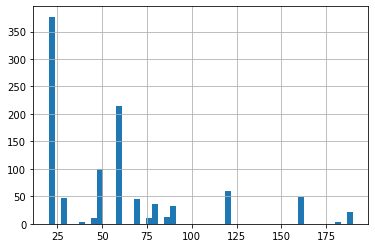

In [18]:
# before transforming variable
train_t['MSSubClass'].hist(bins=50)

<AxesSubplot:>

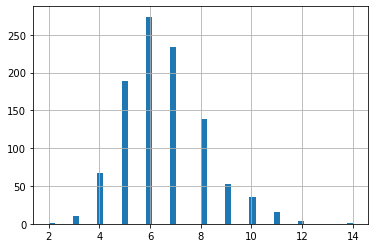

In [19]:
# before transforming variable
train_t['TotRmsAbvGrd'].hist(bins=50)

In [20]:
#transforming variables
train_t = yjt_defualt.transform(train_t)
test_t = yjt_defualt.transform(test_t)

<AxesSubplot:>

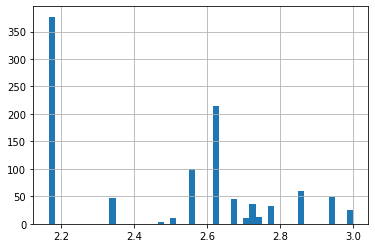

In [21]:
# transformed variable
train_t['MSSubClass'].hist(bins=50)

<AxesSubplot:>

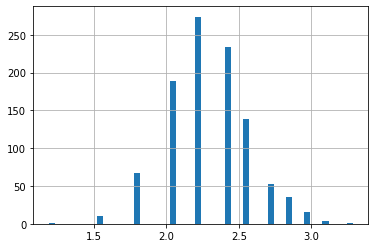

In [22]:
# transformed variable
train_t['TotRmsAbvGrd'].hist(bins=50)